# Задания для самостоятельного решения


### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
sigma = 225**0.5
e = 3
beta = 0.95

n = (stats.norm.ppf((1+beta)/2)*sigma/e)**2
#print(stats.norm.ppf((1+beta)/2))
n.round()

96.0

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [12]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

t , p  = stats.ttest_ind(population_men,population_women)

print("t = ", t)
print("p = ", p)

if p < 0.001:
    print('P-value < уровня значисмости 0.001. Отвергаем гипотезу H0 - между двумя выборками нет значительного различия')
else:
    print('P-value > уровня значисмости 0.001. Принимаем гипотезу H0 - между двумя выборками нет значительного различия')


t =  2.819637182021619
p =  0.004807806151552053
P-value > уровня значисмости 0.001. Принимаем гипотезу H0 - между двумя выборками нет значительного различия


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D0128D588>]],
      dtype=object)

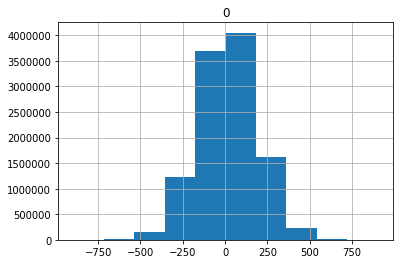

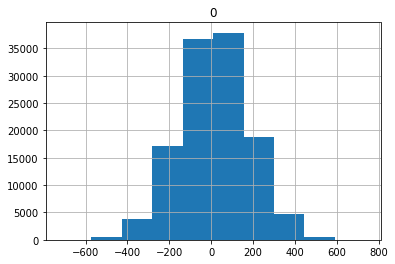

In [4]:
pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [13]:
sigma = 150
e = 50
betta = 0.95

n = (stats.norm.ppf((1+betta)/2)*sigma/e)**2

n.round()

35.0

### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [14]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [25]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations.values)  # Возможно вам пригодится эта функция.

print('p-value = ',pvalue)

if pvalue > 0.05:
    print('результат: значение точного критерия Фишера больше критического 0.05, принимается нулевая гипотеза и делается вывод об отсутствии статистически значимых различий между предсказаниями мага и реальным прогнозом')
else:
    print('зерультат: значение точного критерия Фишера меньше критического 0.05, принимается альтернативная гипотеза и делается вывод о наличии статистически значимых различий между предсказаниями мага и реальной погодой')

p-value =  0.828664440194697
результат: значение точного критерия Фишера больше критического 0.05, принимается нулевая гипотеза и делается вывод об отсутствии статистически значимых различий между предсказаниями мага и реальным прогнозом


### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [27]:
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence)/2, n)#квантиль Т стюдента
    return m-h,m, m+h


print(mean_confidence_interval(data, 0.90))


(5.843062450077532, 6.4411764705882355, 7.039290491098939)


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [31]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1 ,data_2)
t,p

if p < 0.05:
    print('P-value < уровня значисмости 0.05. Отвергаем гипотезу H0 - между двумя выборками нет значительного различия')
else:
    print('P-value > уровня значисмости 0.05. Принимаем гипотезу H0 - между двумя выборками нет значительного различия')

P-value < уровня значисмости 0.05. Отвергаем гипотезу H0 - между двумя выборками нет значительного различия


In [ ]:
не совсем поняла результат, тк на графике они сильно различаются

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D024C2648>]],
      dtype=object)

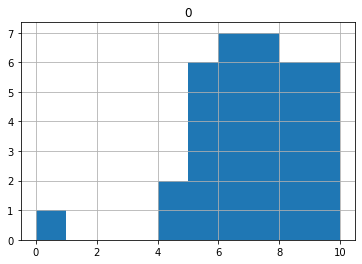

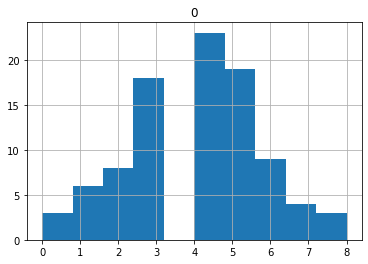

In [29]:
pd.DataFrame(data_1).hist()
pd.DataFrame(data_2).hist()

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

будем считать, что уровень значимости стандартный 0.05, 0.03 меньше 0.05 значит отвергаем нулевую гипотезу о том, что распределение нормально

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

In [37]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

stats.ttest_ind(A,B,equal_var=False)
pvalue

0.828664440194697

P-value > уровня значисмости 0.05. Принимаем гипотезу H0 - между двумя выборками нет значительного различия
при p-value 0.049999 различия были бы уже значимы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D0290F3C8>]],
      dtype=object)

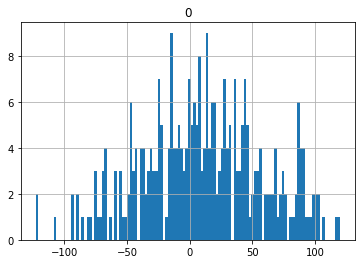

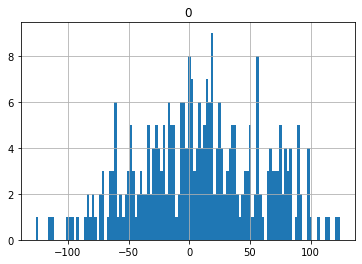

In [38]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)